In [1]:
# %load_ext autoreload
# %autoreload 2

In [2]:
%load_ext line_profiler

In [3]:
%cd ..

D:\dev\bayes-crm


In [5]:
import scipy.stats as st
from crm.levy_processes import *
from crm.crm_approx import *
from crm.fk import *
from crm.utils.general_utils import measure_time_process
from crm.utils.levy_process_utils import *
from crm.two_piece_envelope import two_envelope_beta

plt.style.use("bmh")

In [6]:
m = 1
c = 2
sigma = 0.5

# Beta Process speed

In [8]:
num_fits = 1000

In [9]:
fk_time = measure_time_process(ferguson_klass, int(num_fits/10), beta_process(m, c), size=100)
fk_time

100%|██████████| 100/100 [00:11<00:00,  8.86it/s]


0.11288260459899903

In [10]:
start_time = time.time()
for _ in range(num_fits):
    x = two_envelope_beta(m, c, 100)
env_time = (time.time() - start_time) / num_fits
env_time

1.991748809814453e-06

In [11]:
my_time = {}
for n in tqdm([101, 1001, 10001, 100001]):
    my_time[n] = measure_time_approx_process(num_fits, beta_process(m, c), n, g_beta_process(m, c), -1, size=100, thr=0.5)

100%|██████████| 1000/1000 [00:00<00:00, 10336.50it/s]

100%|██████████| 4/4 [00:12<00:00,  3.18s/it]


In [12]:
env_time / my_time[1001]

0.015244358638409068

In [13]:
fk_time / my_time[1001]

863.9758688773481

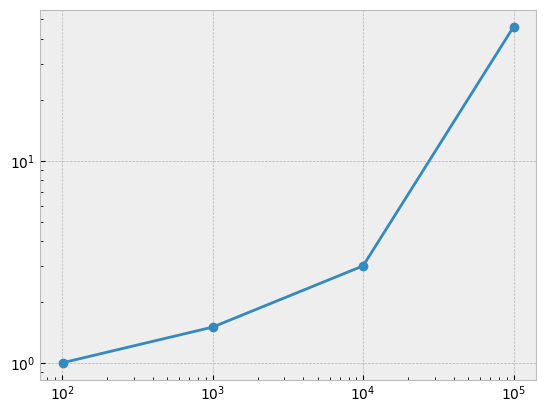

In [20]:
plt.loglog(my_time.keys(), np.array(list(my_time.values())) / my_time[101], marker="o")

In [5]:
my_time = {}
num_fits = 1
for n in tqdm([1001]):
    my_time[n] = measure_time_approx_process(num_fits, gamma_process(1), n, g_gamma_process(1), -1, size=100, thr=0.5, bounds=(1e-10, np.inf))

  0%|          | 0/1 [01:16<?, ?it/s]


KeyboardInterrupt: 

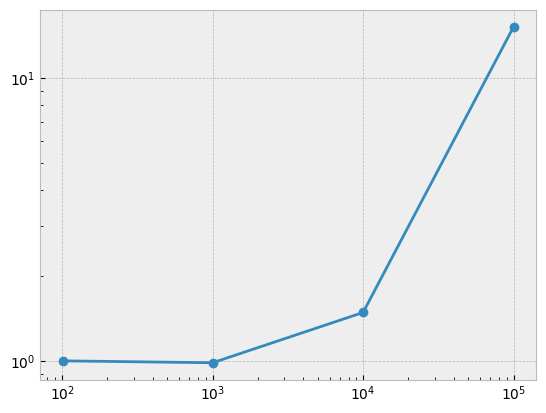

In [25]:
plt.loglog(my_time.keys(), np.array(list(my_time.values())) / my_time[101], marker="o")

## Gamma process speed

In [8]:
p = ApproxProcess(beta_process(m, c), 1001, g_beta_process(m, c), -1, thr=0.5)
arrival_times = np.random.exponential(size=100).cumsum()
%lprun -f p.generate p.generate(arrival_times)

In [6]:
p = ApproxProcess(gamma_process(1), 1001, g_gamma_process(m), -1, thr=0.5, bounds=(1e-10, np.inf))
arrival_times = np.random.exponential(size=100).cumsum()
%lprun -f p._check_tail p.generate(arrival_times)

# Beta Process accuracy

In [5]:
num_fits = 10
c = 2
m = 1
n_grids = [1001, 10001, 100001, 1000001]

In [6]:
errors, jump_sizes = process_errors_and_jump_sizes(num_fits, beta_process, {"m": m, "c": c}, n_grids, g_beta_process, use_trap=False, thr=0.5, cache=False)

100%|██████████| 10/10 [00:02<00:00,  4.34it/s]


In [7]:
errors_trap, jump_sizes_trap = process_errors_and_jump_sizes(num_fits, beta_process, {"m": m, "c": c}, n_grids, g_beta_process, use_trap=True, cache=False)

100%|██████████| 10/10 [00:02<00:00,  4.70it/s]


(<Figure size 500x500 with 1 Axes>,
 <Axes: xlabel='Jump size', ylabel='Relative error'>)

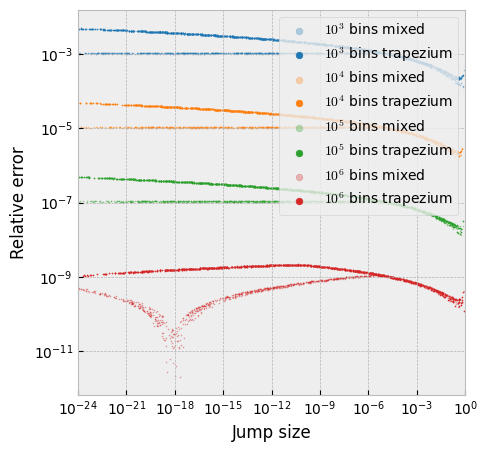

In [8]:
plot_errors_and_jump_sizes(jump_sizes, errors, n_grids, jump_sizes_trap, errors_trap, "error_beta_m_1_c_2_thr_50.pdf") # "error_beta_m_1_c_2_thr_50.pdf"

(<Figure size 500x500 with 1 Axes>,
 <Axes: xlabel='Jump size', ylabel='Relative error'>)

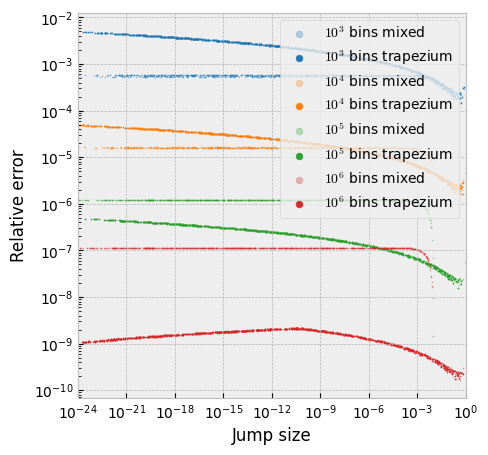

In [9]:
plot_errors_and_jump_sizes(jump_sizes, errors, n_grids, jump_sizes_trap, errors_trap, "error_beta_m_1_c_2_thr_80.pdf") #

# Stable Beta Process accuracy

In [8]:
num_fits = 5
c = 2
m = 1
sigma = 0.1
n_grids = [1001, 10001, 100001, 1000001] # 1001, 10001, 100001,

In [9]:
errors, jump_sizes = process_errors_and_jump_sizes(num_fits, stable_beta_process, {"m": m, "c": c, "sigma": sigma}, n_grids, g_stable_beta_process, use_trap=False, thr=0.5, n_jumps=1000)

100%|██████████| 1/1 [00:07<00:00,  7.69s/it]


In [10]:
errors_trap, jump_sizes_trap = process_errors_and_jump_sizes(num_fits, stable_beta_process, {"m": m, "c": c, "sigma": sigma}, n_grids, g_stable_beta_process, use_trap=True, n_jumps=1000)

100%|██████████| 1/1 [00:06<00:00,  6.04s/it]


(<Figure size 500x500 with 1 Axes>,
 <Axes: xlabel='Jump size', ylabel='Relative error'>)

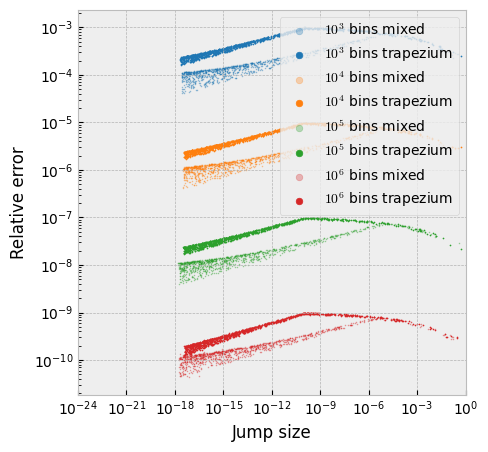

In [12]:
plot_errors_and_jump_sizes(jump_sizes, errors, n_grids, jump_sizes_trap, errors_trap, "error_stable_beta_m_1_c_2_s_01_thr_50.pdf") #

# Gamma Process accuracy

In [7]:
num_fits = 10
m = 1
n_grids = [1001, 10001, 100001, 1000001] # 

In [8]:
errors, jump_sizes = process_errors_and_jump_sizes(num_fits, gamma_process, {"m": m}, n_grids, g_gamma_process, bounds=(1e-10, np.inf), use_trap=False, thr=0.5, n_jumps=40, cache=False)

100%|██████████| 10/10 [00:01<00:00,  7.64it/s]


In [9]:
errors_trap, jump_sizes_trap = process_errors_and_jump_sizes(num_fits, gamma_process, {"m": m}, n_grids, g_gamma_process, bounds=(1e-10, np.inf), use_trap=True, n_jumps=40, cache=False)

100%|██████████| 10/10 [00:01<00:00,  8.44it/s]


(<Figure size 500x500 with 1 Axes>,
 <Axes: xlabel='Jump size', ylabel='Relative error'>)

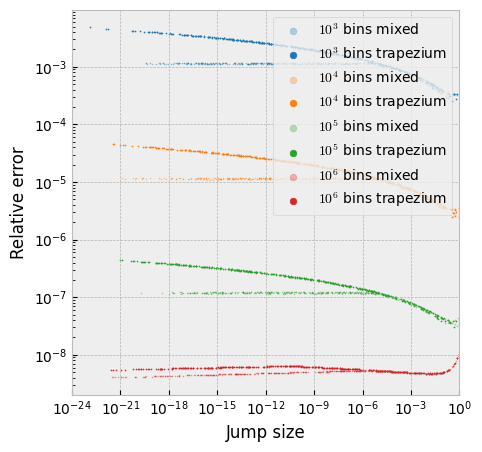

In [19]:
plot_errors_and_jump_sizes(jump_sizes, errors, n_grids, jump_sizes_trap, errors_trap, "error_gamma_m_1_thr_50.pdf") #

(<Figure size 500x500 with 1 Axes>,
 <Axes: xlabel='Jump size', ylabel='Relative error'>)

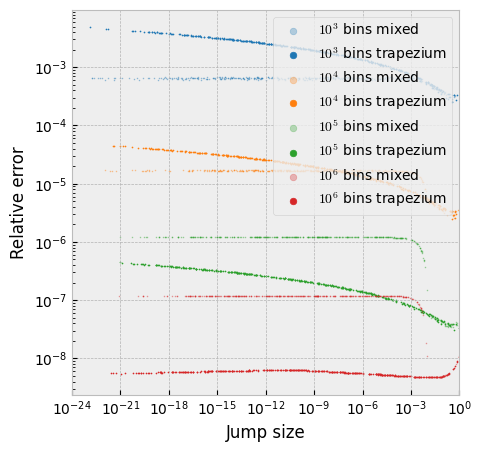

In [21]:
plot_errors_and_jump_sizes(jump_sizes, errors, n_grids, jump_sizes_trap, errors_trap, "error_gamma_m_1_thr_80.pdf") #

## Error Poisson process rate

### Beta Process

In [4]:
ms = [1, 2, 3, 5, 7, 10]
cs = [2, 3, 20]
trapezium_poi, mixed_poi = process_error_rate_vs_params([1001], {"m": ms, "c": cs}, beta_process, g_beta_process)

100%|██████████| 18/18 [00:07<00:00,  2.28it/s]


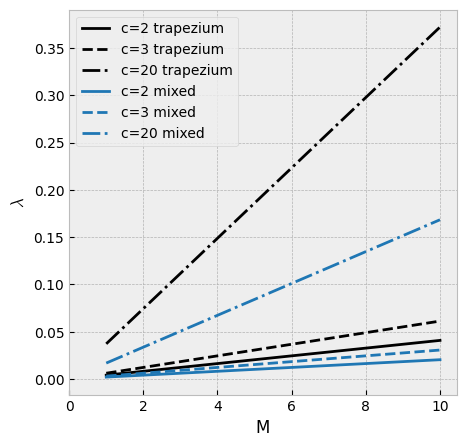

In [14]:
plot_beta_process_err_rate_vs_m(None, ms, cs, trapezium_poi, mixed_poi, "beta_poi_rate.pdf")

### Stable Beta Process

In [233]:
sigmas = [0.1, 0.3, 0.9]
ms = [1, 2, 3, 5, 7, 10]
cs = [2, 3, 20]
thresholds = [0.8]
trapezium_poi, mixed_poi = process_error_rate_vs_params([1001], {"m": ms, "c": cs, "sigma": sigmas}, stable_beta_process, g_stable_beta_process, thresholds=thresholds)

100%|██████████| 54/54 [01:08<00:00,  1.26s/it]


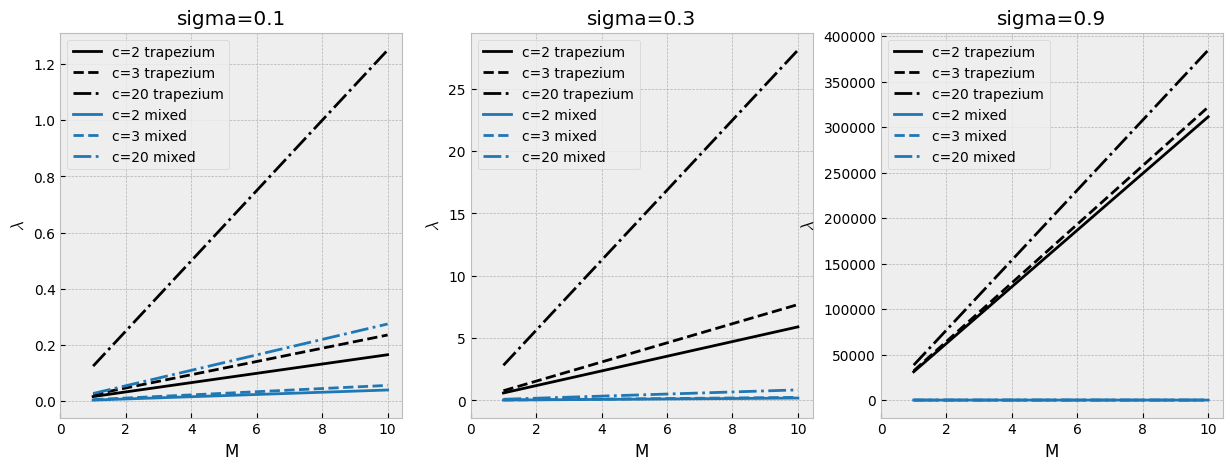

In [232]:
plot_beta_process_err_rate_vs_m(sigmas, ms, cs, trapezium_poi, mixed_poi, "stable_beta_poi_rate_1k_thr50.pdf")

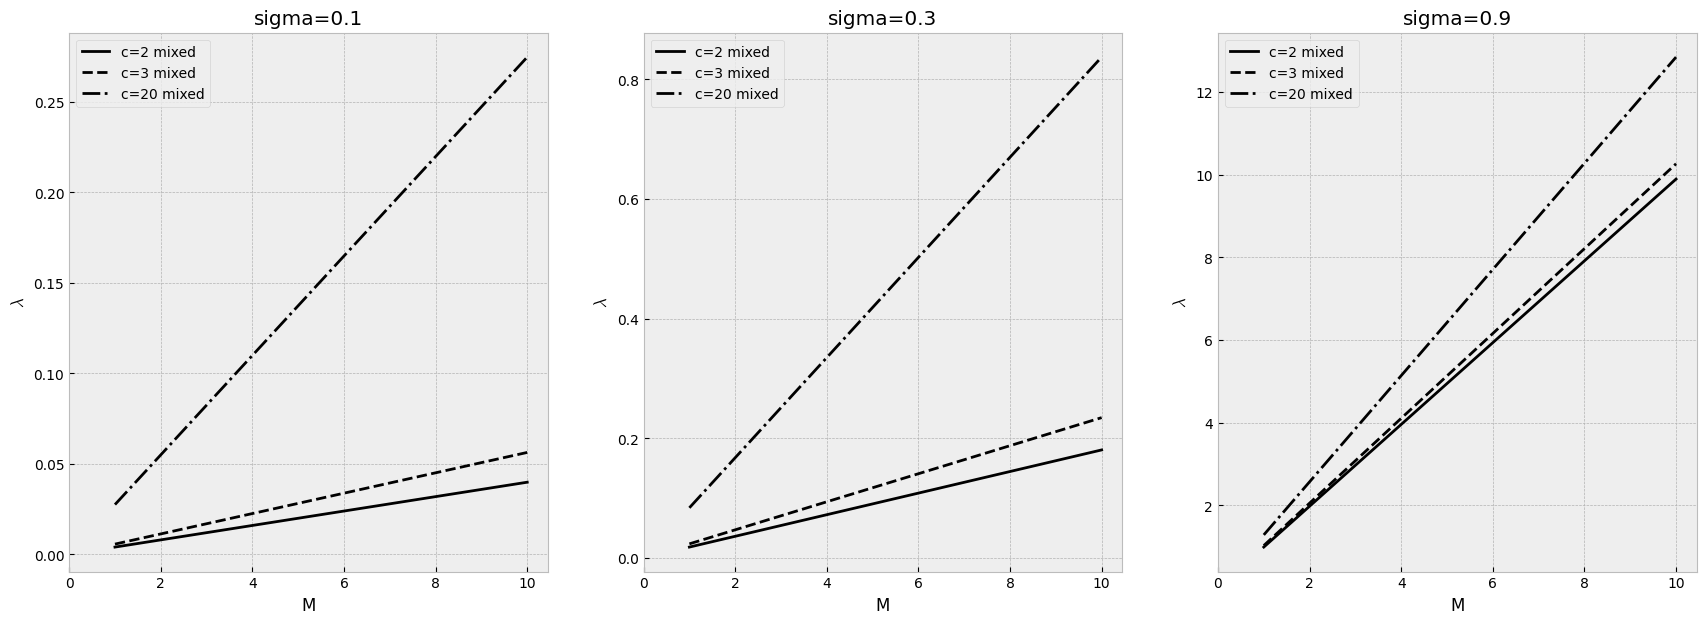

In [58]:
plot_beta_process_err_rate_vs_m(sigmas, ms, cs, None, mixed_poi, "stable_beta_poi_rate_mixed_1k.pdf")

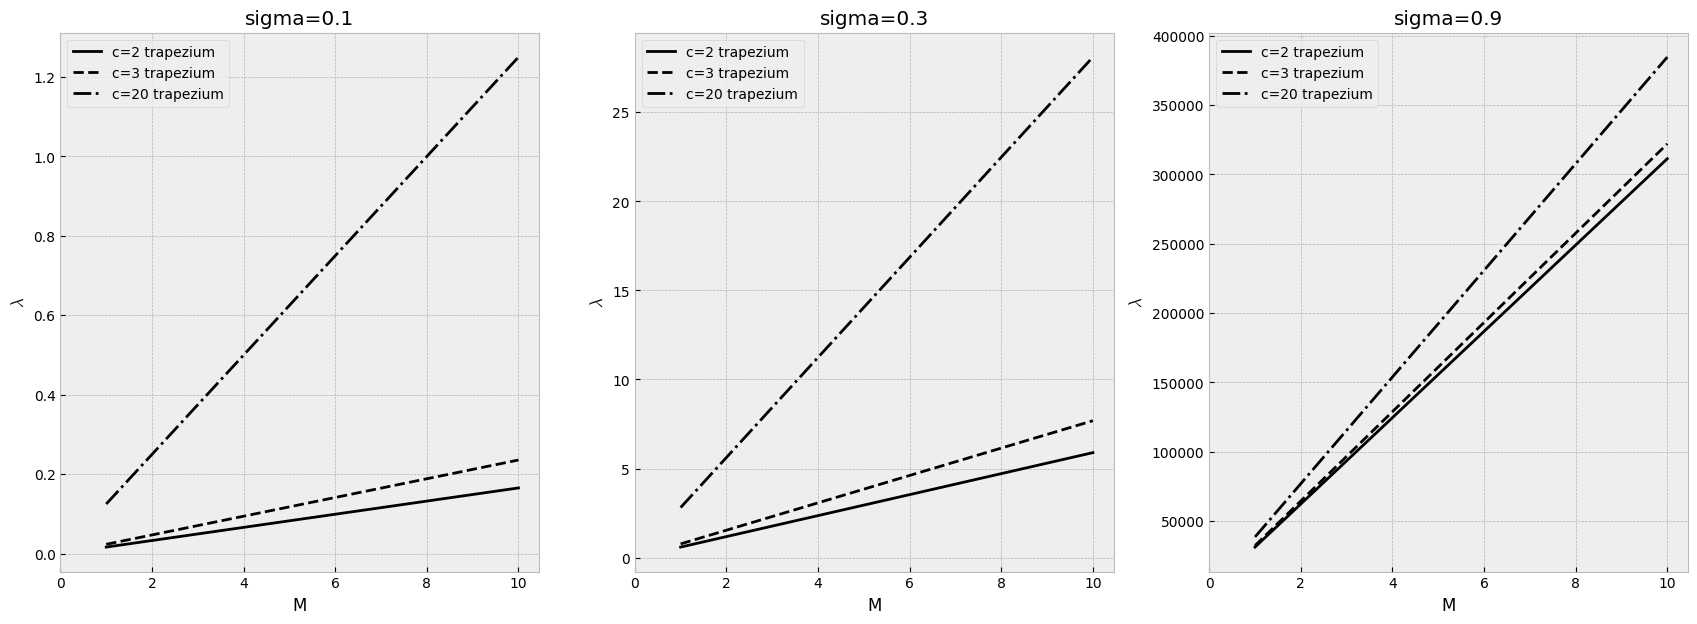

In [59]:
plot_beta_process_err_rate_vs_m(sigmas, ms, cs, trapezium_poi, None, "stable_beta_poi_rate_trapezium_1k.pdf")

### Error as a function of number of bins

#### Stable Beta

In [161]:
sigmas = [0.1, 0.3, 0.9]
ms = [1]
cs = [2, 3, 20]
num_edges = [101, 1001, 10001, 100001] # 
thresholds = [0.8]

stable_beta_error_trap, stable_beta_error_mixed = process_error_rate_vs_params(num_edges, {"m": ms, "c": cs, "sigma": sigmas}, stable_beta_process, g_stable_beta_process, thresholds=thresholds)


100%|██████████| 36/36 [00:27<00:00,  1.31it/s]


D:\dev\IBP\IBP\levy_process_utils.py:329: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  axs[i].set_xlim(0, None)


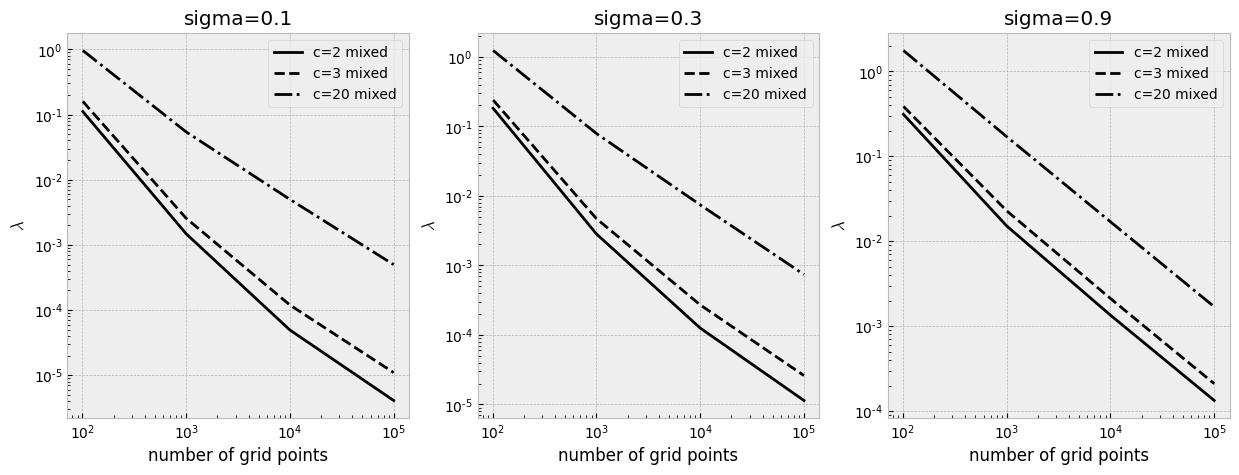

In [162]:
plot_poi_er_vs_num_grids(num_edges, {"m": ms, "c": cs, "sigma": sigmas}, stable_beta_error_mixed, filename="stable_beta_poi_rate_mixed_error_bin_count_thr_80.pdf")

D:\dev\IBP\IBP\levy_process_utils.py:224: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


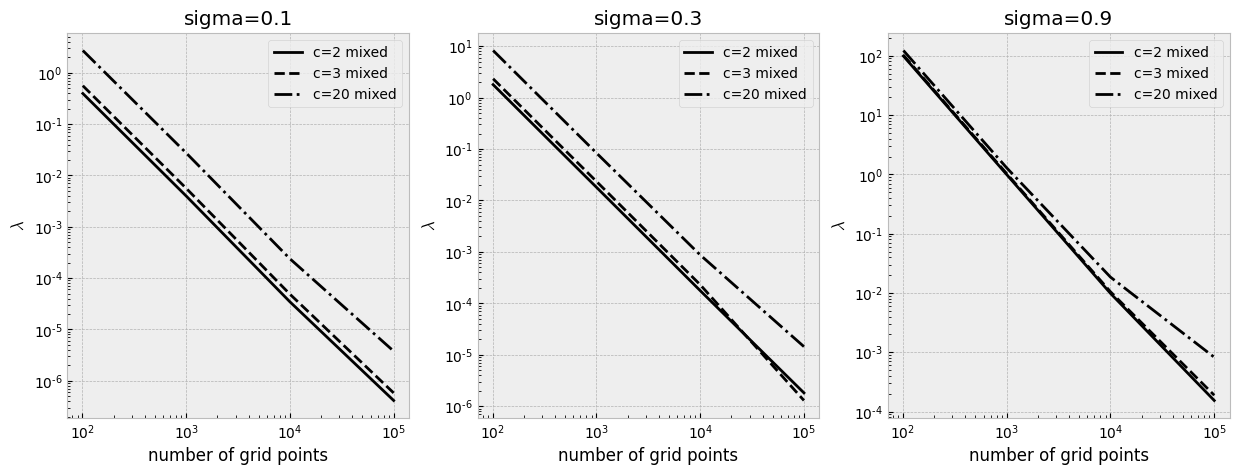

In [21]:
plot_poi_er_vs_num_grids(num_edges, {"m": ms, "c": cs, "sigma": sigmas}, stable_beta_error_mixed, filename="stable_beta_poi_rate_mixed_error_bin_count.pdf")

#### Beta

In [172]:
ms = [1]
cs = [2, 3, 20]
num_edges = [101, 1001, 10001, 100001]
thresholds = [0.8]

beta_error_trap, beta_error_mixed = process_error_rate_vs_params(num_edges, {"m": ms, "c": cs}, beta_process, g_beta_process, thresholds=thresholds)

100%|██████████| 12/12 [00:00<00:00, 109.38it/s]


D:\dev\IBP\IBP\levy_process_utils.py:347: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(0, None)


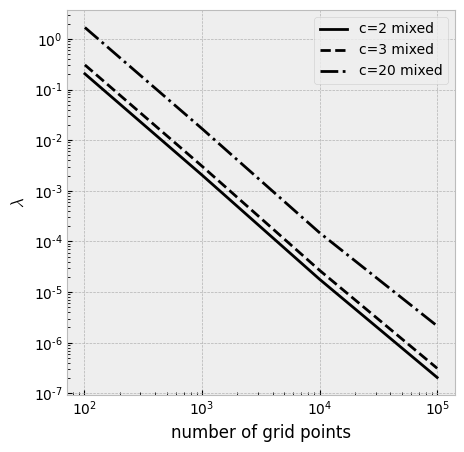

In [165]:
plot_poi_er_vs_num_grids(num_edges, {"m": ms, "c": cs,}, beta_error_mixed, filename="beta_poi_rate_mixed_error_bin_count_thr_50.pdf")

D:\dev\IBP\IBP\levy_process_utils.py:347: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(0, None)


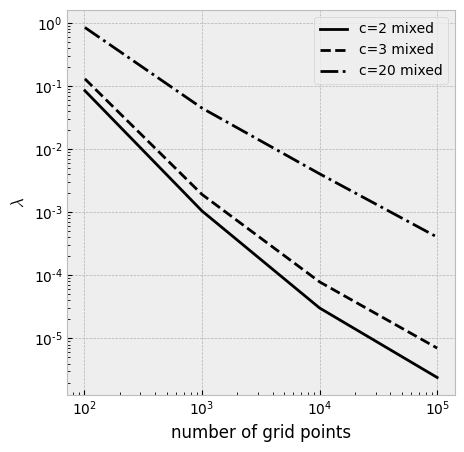

In [173]:
plot_poi_er_vs_num_grids(num_edges, {"m": ms, "c": cs,}, beta_error_mixed, filename="beta_poi_rate_mixed_error_bin_count_thr_80.pdf")

### Error rate vs threshold

#### Stable Beta Process

In [255]:
sigmas = [0.1, 0.3, 0.9]
ms = [1]
cs = [2, 3, 20]
num_edges = [1001, 10001, 100001] # 
thresholds = list(np.linspace(0.1, 0.9, 9))


stable_beta_error_trap_thr, stable_beta_error_mixed_thr = process_error_rate_vs_params(num_edges, {"m": ms, "c": cs, "sigma": sigmas}, stable_beta_process, g_stable_beta_process, thresholds=thresholds)

100%|██████████| 243/243 [2:45:23<00:00, 40.84s/it] 


##### $c = 2$

(None, <Axes: xlabel='$x_{\\text{thr}}$', ylabel='$\\lambda$'>)

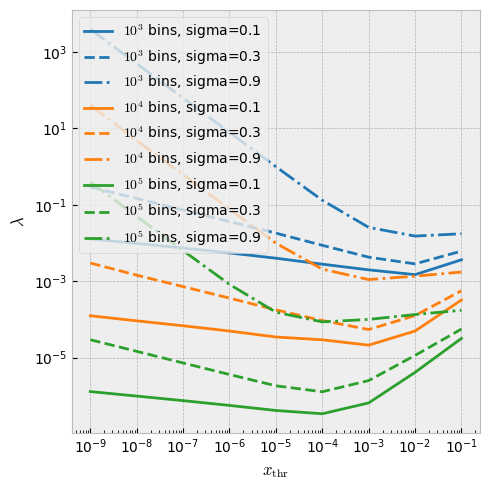

In [236]:
plot_error_vs_threshold_s(stable_beta_error_mixed_thr, num_edges, thresholds, sigmas, "stable_beta_process_mixed_error_sigma_thr.pdf")

##### $\sigma = 0.1$

(None, <Axes: xlabel='Threshold', ylabel='$\\lambda$'>)

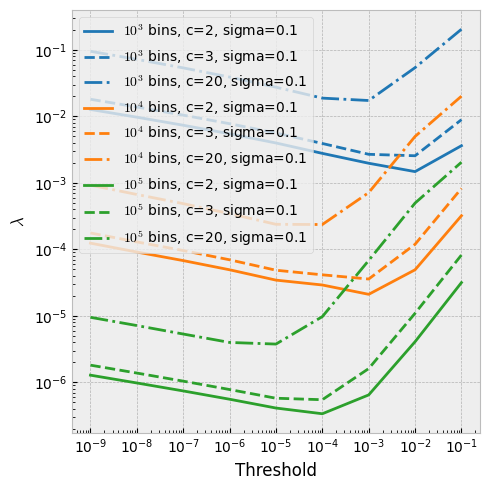

In [263]:
plot_error_vs_threshold_stable_beta_c(stable_beta_error_mixed_thr, num_edges, thresholds, cs, sigmas, 0,"stable_beta_process_mixed_error_sigma_01_thr.pdf")

##### $\sigma = 0.3$

(None, <Axes: xlabel='Threshold', ylabel='$\\lambda$'>)

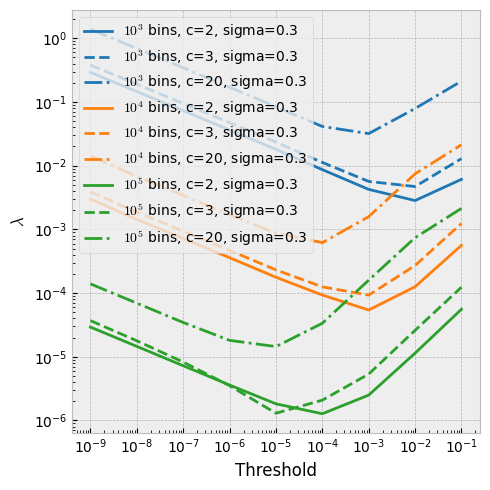

In [261]:
plot_error_vs_threshold_stable_beta_c(stable_beta_error_mixed_thr, num_edges, thresholds, cs, sigmas,"stable_beta_process_mixed_error_sigma_03_thr.pdf")

#### $\sigma = 0.9$

(None, <Axes: xlabel='Threshold', ylabel='$\\lambda$'>)

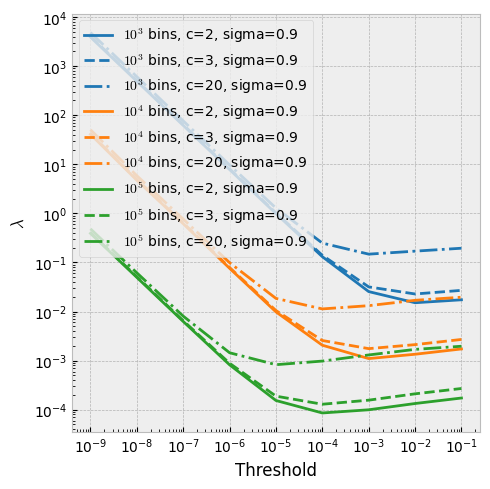

In [262]:
plot_error_vs_threshold_stable_beta_c(stable_beta_error_mixed_thr, num_edges, thresholds, cs, sigmas,"stable_beta_process_mixed_error_sigma_09_thr.pdf")

#### Beta Process

In [11]:
%%time
ms = [1, 2, 3, 5, 7, 10]
cs = [2, 3, 20]
num_edges = [1001, 10001, 100001] # 
thresholds = list(np.linspace(0.1, 0.9, 9))

beta_error_trap_thr, beta_error_mixed_thr = process_error_rate_vs_params(num_edges, {"m": ms, "c": cs}, beta_process, g_beta_process, thresholds=thresholds)

100%|██████████| 486/486 [2:11:35<00:00, 16.25s/it]


CPU times: total: 1min 6s
Wall time: 2h 29min 29s


(None, <Axes: xlabel='Threshold', ylabel='$\\lambda$'>)

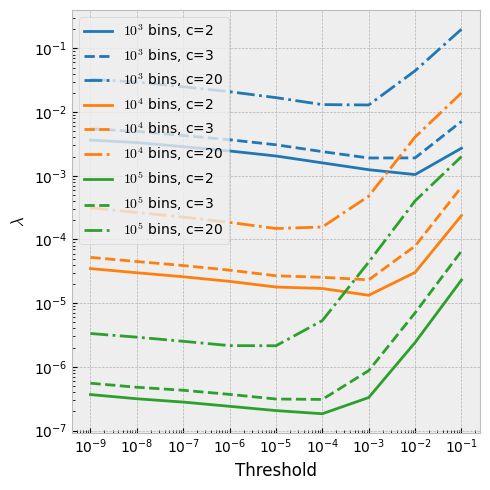

In [9]:
plot_error_vs_threshold_c(beta_error_mixed_thr, num_edges, thresholds, cs, "beta_process_mixed_error_c_thr.pdf")

(None, <AxesSubplot:>)

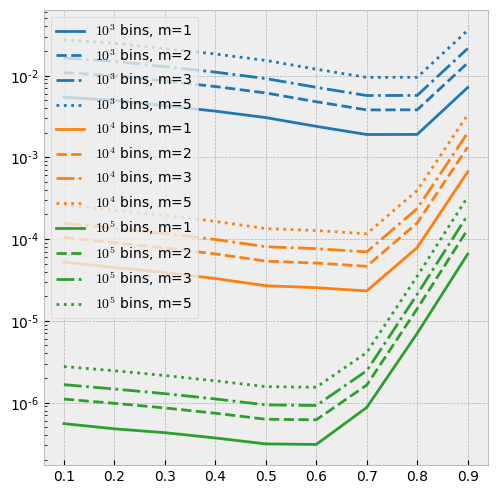

In [131]:
plot_error_vs_threshold_m(beta_error_mixed_thr, num_edges, thresholds, ms, "beta_process_mixed_error_m_thr.pdf")

## Speed Test

In [432]:
for _ in tqdm(range(10000)):
    bp = ApproxProcess(
                p_x,
                1001,
                g_x,
                -1,
                thr=0.8,
            )
    len(bp.generate(size=50))

100%|██████████| 10000/10000 [00:03<00:00, 3291.77it/s]


In [434]:
for _ in tqdm(range(10000)):
    sm = StripMethod(p_x,
                 edges = bp.edges,
                 pdf = None,
                 bounds = (1e-10, 1.0))
    len(sm.generate(50))

100%|██████████| 10000/10000 [00:10<00:00, 976.82it/s]


# Bin plots

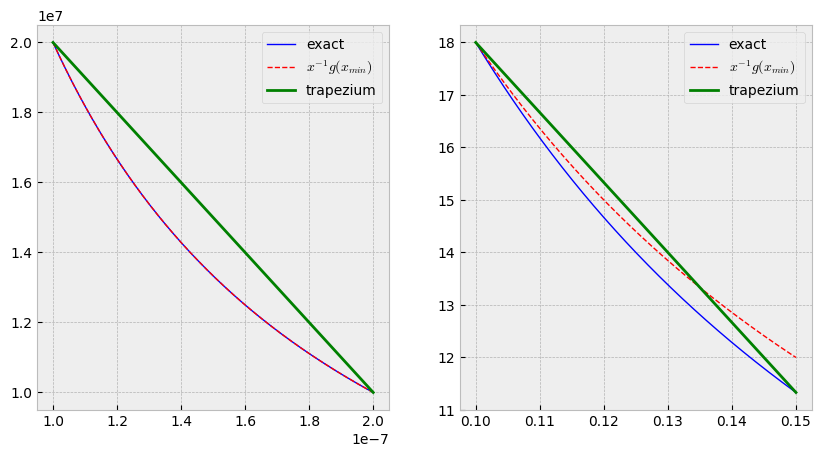

In [283]:
c = 2
m = 1
sigma = 0
ranges = [(1e-7, 2e-7), (0.1, 0.15)]  # [(lower1, upper1), (lower2, upper2)]
filename = "integration.pdf"
plot_beta_process({"c": c, "m": m}, ranges, filename, is_stable=False)

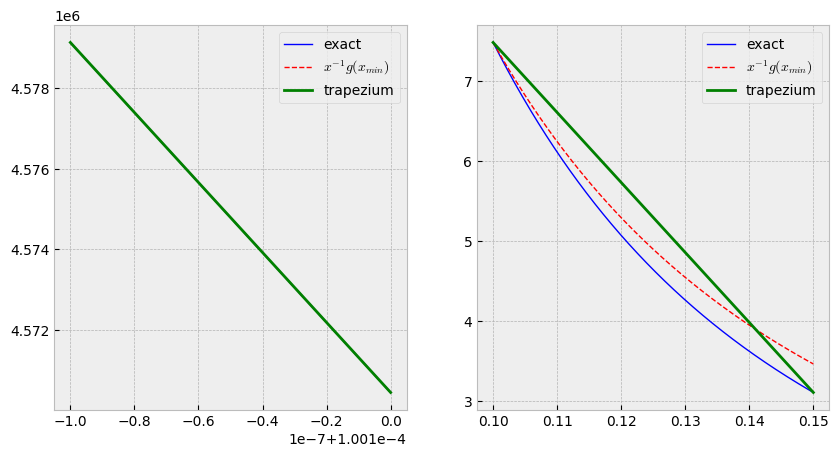

In [293]:
c = 2
m = 1
sigma = 0.9
ranges = [(1e-4, 1.001e-4), (0.1, 0.15)]  # [(lower1, upper1), (lower2, upper2)]
filename = "integration.pdf"
plot_beta_process({"c": c, "m": m, "sigma": sigma}, ranges, filename, is_stable=True)

In [174]:
c = 2
m = 1
xs = np.linspace(0, 80, 5001, endpoint=True)

p_trap = ApproxProcess(beta_process(m, c), 1001)
p_mix = ApproxProcess(beta_process(m, c), 1001, g_beta_process(m, c), -1)
p_prec = ApproxProcess(beta_process(m, c), 10000001)
interp_points = p_mix.generate(xs)
interp_points_trapezium = p_trap.generate(xs)
interp_points_prec = p_prec.generate(xs)
c_sum = p_mix.c_sum
c_sum_trapezium = p_trap.c_sum
c_sum_prec = p_prec.c_sum
edges = p_mix.edges
edges_prec = p_prec.edges

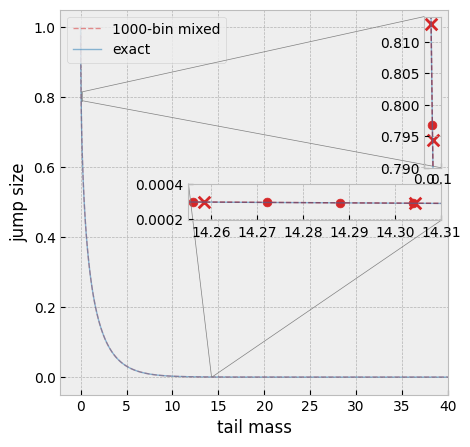

In [175]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

def create_inset(ax, zoom, loc, c_sum, edges, xs, interp_points, c_sum_prec, edges_prec, xlim, ylim):
    axins = zoomed_inset_axes(ax, zoom, loc=loc)
    axins.plot(c_sum, edges[:-1][::-1], ls="--", lw=1, c="tab:red")
    axins.scatter(c_sum, edges[:-1][::-1], marker="x", s=70, c="tab:red")
    axins.scatter(xs, interp_points, c="tab:red", s=40, marker="o")
    axins.plot(c_sum_prec, edges_prec[1:][::-1], c="tab:blue", lw=1, alpha=0.5)
    axins.set_xlim(*xlim)
    axins.set_ylim(*ylim)
    mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

fig, ax = plt.subplots(figsize=(5, 5))

(ln1,) = ax.plot(c_sum, edges[:-1][::-1], ls="--", lw=1, c="tab:red", alpha=0.5)
(ln2,) = ax.plot(c_sum_prec, edges_prec[:-1][::-1], lw=1, c="tab:blue", alpha=0.5)
ax.legend([ln1, ln2], [r"1000-bin mixed", "exact"], loc=2)

create_inset(ax, 500, "center right", c_sum, edges, xs, interp_points, c_sum_prec, edges_prec, (14.255, 14.31), (0.00019, 0.0004))
create_inset(ax, 18, "upper right", c_sum, edges, xs, interp_points, c_sum_prec, edges_prec, (0.000, 0.1), (0.79, 0.814))

ax.set_ylabel("jump size")
ax.set_xlabel("tail mass")
ax.set_xlim(None, 40)

fig.savefig("klass-ferg_1.pdf", bbox_inches="tight")

# Mixture

## Example 1

In [37]:
c = 20
alpha = 2
M = 1
mixture_p = lambda x: M * c * x ** (-1) * (1 - x) ** (c - 1) + M * (
    c * (c - 1) / alpha
) * (1 - x) ** (c - 2)

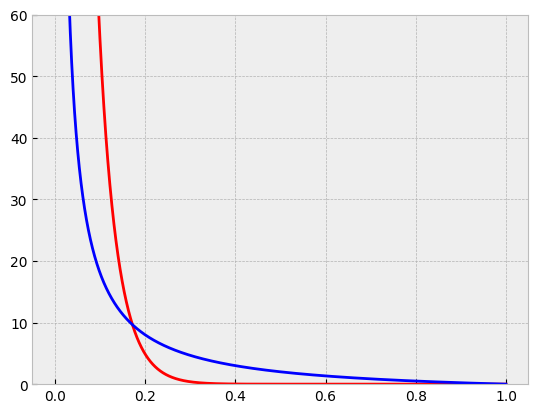

In [38]:
fig, ax = plt.subplots()
xs = np.linspace(0 + 1e-6, 1, 1000000)
ax.plot(xs, mixture_p(xs), c="red")
ax.plot(xs, beta_process(1, 2)(xs), c="blue")
ax.set_ylim(0, 60)
plt.show()

In [39]:
cs = [2, 3, 20]
ms = [1, 2, 3, 5, 7, 10]
alphas = [1, 2, 3, 10]

In [42]:
num_fits = 100
res_num = {}
res_fk = {}

for alpha in tqdm(alphas):
    res_fk[alpha] = {}
    res_num[alpha] = {}
    for c in cs:
        res_num[alpha][c] = {}
        res_fk[alpha][c] = {}
        for M in ms:
            res_fk[alpha][c][M] = measure_time_process(ferguson_klass, num_fits, mixture_p)
            # p = ApproxProcess(mixture_p, 1001, thr=0.8)
            res_num[alpha][c][M] = measure_time_approx_process(10*num_fits, mixture_p, 1001)

100%|██████████| 4/4 [04:22<00:00, 65.59s/it]


(<Figure size 2000x500 with 4 Axes>,
 array([<Axes: title={'center': '$\\xi=$1'}, xlabel='M', ylabel='Speed ratio'>,
        <Axes: title={'center': '$\\xi=$2'}, xlabel='M', ylabel='Speed ratio'>,
        <Axes: title={'center': '$\\xi=$3'}, xlabel='M', ylabel='Speed ratio'>,
        <Axes: title={'center': '$\\xi=$10'}, xlabel='M', ylabel='Speed ratio'>],
       dtype=object))

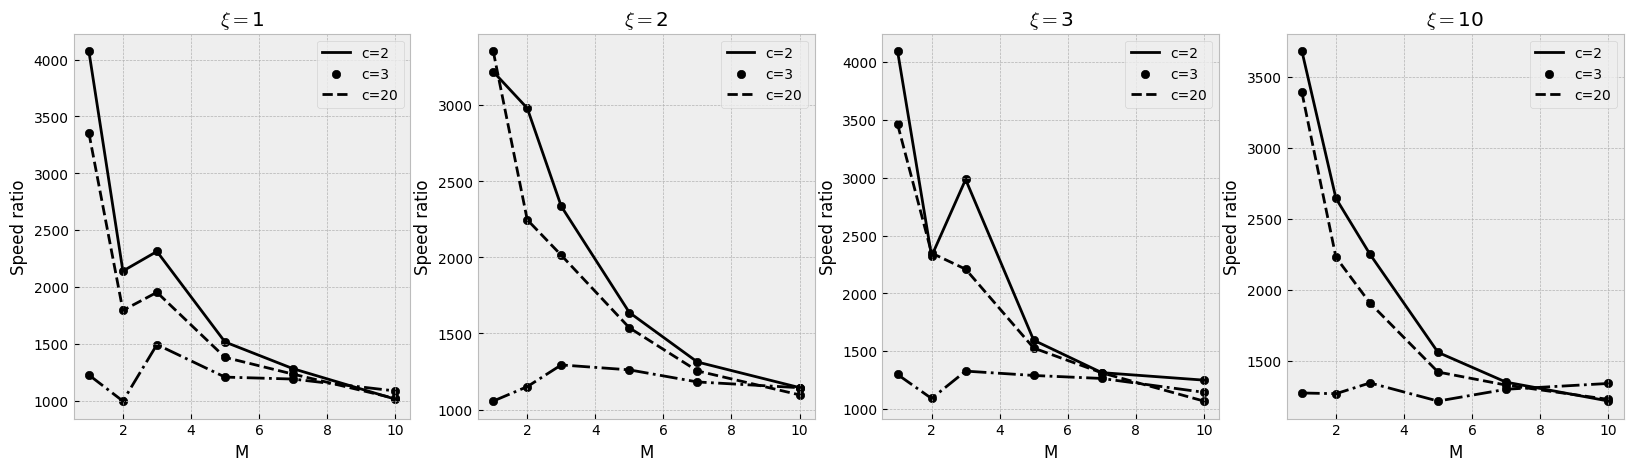

In [43]:
def plot_data_example(alphas, ms, cs, res_fk, res_num, filename=None):
    """
    This function plots the ratio of execution times of two methods for different parameters.
    
    Args:
        alphas (list): List of alpha values to be plotted.
        ms (list): List of m values to be plotted.
        cs (list): List of c values to be plotted.
        res_fk (dict): Nested dictionary with execution times of the first method. 
                       The keys are alpha, c, and m values in this order.
        res_num (dict): Nested dictionary with execution times of the second method. 
                        The keys are alpha, c, and m values in this order.

    Returns:
        None. The function shows a plot as a side effect.
    """
    
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))
    for j, a in enumerate(alphas):
        for i, c in enumerate(cs):
            data = np.array([res_fk[a][c][m] for m in ms]) / np.array([res_num[a][2][m] for m in ms])
            linestyle = "-" if i == 0 else "--" if i == 1 else "-."
            axs[j].plot(ms, data, c="black", ls=linestyle)
            axs[j].scatter(ms, data, c="black")
        axs[j].legend([f"c={c}" for c in cs])     
        axs[j].set_title(r"$\xi=$" + str(a))
        axs[j].set_xlabel("M")
        axs[j].set_ylabel("Speed ratio")
        
    if filename:
        fig.savefig(filename, bbox_inches="tight")
    
    return fig, axs

# Usage
plot_data_example(alphas, ms, cs, res_fk, res_num, "example_1.pdf")

## Example 2

In [150]:
c = 20
sigma = 0.1
alpha = 2
M = 1
const_1 = M * gamma(1 + c) / (gamma(1 - sigma) * gamma(sigma + c))

mixture_p = lambda x: const_1 * alpha / (alpha + sigma) * x ** (-1 - sigma) * (
    1 - x
) ** (c + sigma - 1) + const_1 * (c * (c + alpha - 1) / c) * x ** (-sigma) * (
    1 - x
) ** (
    c + sigma - 2
)

In [151]:
start_time = time.time()
num_fits = 100
for _ in tqdm(range(num_fits)):
    times_of_arrival = np.random.exponential(size=100).cumsum()
    fk = ferguson_klass(times_of_arrival, mixture_p)
fk_time = time.time() - start_time

100%|████████████████████████████████████████| 100/100 [00:38<00:00,  2.62it/s]


In [152]:
start_time = time.time()
num_fits = 100
for _ in tqdm(range(num_fits)):
    times_of_arrival = np.random.exponential(size=100).cumsum()
    p = ApproxProcess(mixture_p, 1001)
    jumps = p.generate(times_of_arrival)
my_time = time.time() - start_time

100%|██████████████████████████████████████| 100/100 [00:00<00:00, 2093.58it/s]


In [153]:
fk_time / my_time

738.3442251131743

In [702]:
exp_rv = np.random.exponential(size=200)
times_of_arrival = exp_rv.cumsum()

In [703]:
np.interp(times_of_arrival, c_sum, edges[1:][::-1]).sum()

2.09332073366681

In [704]:
%%time
res = np.empty(10000)
for i in range(10000):
    exp_rv = np.random.exponential(size=200)
    times_of_arrival = exp_rv.cumsum()
    res[i] = np.interp(times_of_arrival, c_sum, edges[1:][::-1]).sum()
    #np.mean([np.sum(b_p_approx(1000)) for i in range(1000)])

CPU times: total: 28 s
Wall time: 28.1 s


# Occupancy model

In [44]:
from IBP.occupancy_model import OccupancyModel, predictive

## Sample posteriors

In [45]:
np.random.seed(2)
m = 1
c = 2
theta_1 = 0.6
q_1 = 0.2
n = 10
K = 5
prior_theta = beta_process(m, c)
prior_q = st.beta(2, 2).pdf

In [46]:
Z = np.random.binomial(n=1, p=theta_1, size=n)

In [47]:
Y = np.random.binomial(n=1, p=Z * np.ones((K, n)) * q_1)

In [48]:
om = OccupancyModel(prior_theta, prior_q, n, K)

In [49]:
%%time
theta_posterior, q_cond_posterior = om.posterior(Y)
un_theta_posterior, un_q_cond_posterior = om.posterior(np.zeros(Y.shape))

CPU times: total: 781 ms
Wall time: 944 ms


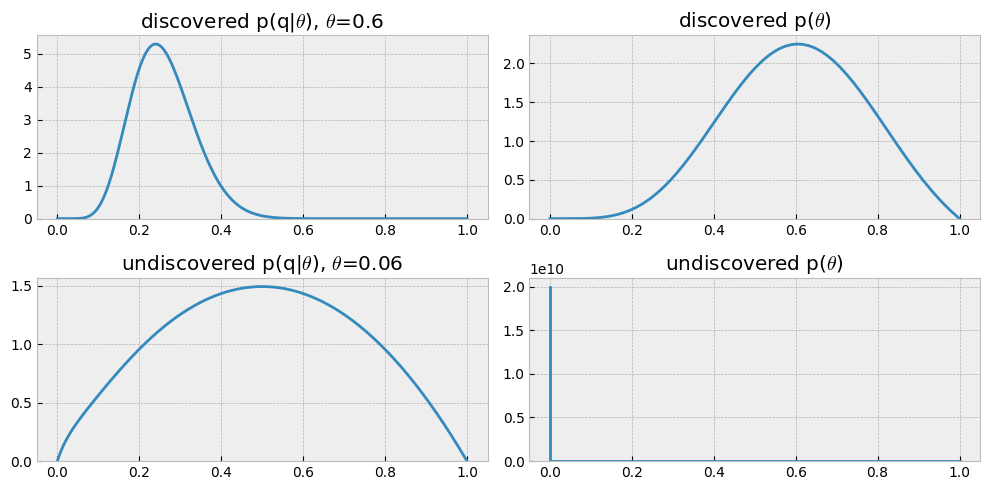

In [50]:
def plot_data(ax, x, y, title):
    ax.plot(x, y)
    ax.set_title(title)
    ax.set_ylim(0, None)

fig, axs = plt.subplots(2, 2, figsize=(10, 5))

plot_data(axs[0, 0], om.q_grid, q_cond_posterior(0.6), r"discovered p(q|$\theta$), $\theta$=0.6")
plot_data(axs[0, 1], om.theta_grid, theta_posterior, r"discovered p($\theta$)")
plot_data(axs[1, 0], om.q_grid, un_q_cond_posterior(0.06), r"undiscovered p(q|$\theta$), $\theta$=0.06")
plot_data(axs[1, 1], om.theta_grid, un_theta_posterior, r"undiscovered p($\theta$)")

fig.tight_layout()
fig.savefig("occupancy_model_posteriors.pdf", bbox_inches="tight")

## Occupancy model full experiment

In [51]:
m = 1
c = 2
theta_1 = 0.6
q_1 = 0.2
n = 10
K = 5
K_new = 5
prior_theta = beta_process(m, c)
prior_q = st.beta(2, 2).pdf
om = OccupancyModel(prior_theta, prior_q, n, K)

### Generate observations

In [52]:
np.random.seed(5)
ap_theta_prior = ApproxProcess(prior_theta)
probs_theta = ap_theta_prior.generate(size=40)
probs_q = st.beta(2, 2).rvs(size=40)

In [55]:
%%time
n_draws = 10000
y_obs, y_unobs = predictive(om, probs_theta, probs_q, n_draws, n, K, K_new, thr=0.8)

40it [00:55,  1.38s/it]
100%|██████████| 10000/10000 [04:45<00:00, 35.02it/s]


CPU times: total: 1min 57s
Wall time: 5min 41s


In [54]:
def calculate_unobserved(y_unobs, n_draws, n, K_new):
    n_prev_unobs = np.zeros(n_draws)
    n_prev_unobs_n = {i: np.zeros(n_draws) for i in range(1, n * K_new + 1)}

    for i in range(y_unobs.shape[0]):
        for j in range(n_draws):
            sm = y_unobs[i][j].sum()
            if sm > 0:
                n_prev_unobs[j] += 1
                n_prev_unobs_n[int(sm)][j] += 1

    return n_prev_unobs, n_prev_unobs_n

n_prev_unobs, n_prev_unobs_n = calculate_unobserved(y_unobs, n_draws, n, K_new)

NameError: name 'y_unobs' is not defined

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(
    n_prev_unobs,
    bins=int(n_prev_unobs.max()),
    density=True,
    range=(0, int(n_prev_unobs.max())),
)
fig.savefig("occupancy_model_n_prev_unobs.pdf", bbox_inches="tight")

In [ ]:
r = 2
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(
    n_prev_unobs_n[r],
    bins=int(n_prev_unobs_n[r].max()),
    density=True,
    range=(0, int(n_prev_unobs_n[r].max())),
)
plt.xticks(np.arange(n_prev_unobs_n[r].min(), n_prev_unobs_n[r].max()+1, 1))
fig.savefig("occupancy_model_n_prev_unobs_r2.pdf", bbox_inches="tight")

# Utils

In [1650]:
import os

In [1653]:

def rename_files_in_directory(directory, old_substring, new_substring):
    """
    Rename files in the given directory that contain the old_substring in their names,
    replacing it with the new_substring.
    """
    # Counter for the number of files renamed
    renamed_files_count = 0

    # List all files in the directory
    for filename in os.listdir(directory):
        # Check if the file name contains the old_substring
        if old_substring in filename:
            # Create the new file name
            new_filename = filename.replace(old_substring, new_substring)
            
            # Full path for old and new file names
            old_file_path = os.path.join(directory, filename)
            new_file_path = os.path.join(directory, new_filename)

            # Rename the file
            os.rename(old_file_path, new_file_path)
            print(f"Renamed '{filename}' to '{new_filename}'")
            renamed_files_count += 1

    print(f"Total files renamed: {renamed_files_count}")

# Example usage
directory_path = r'C:\Users\BearButis\OneDrive\Documents\PhD_lion\ferguson_klass\code\temp'  # Replace with your directory path
old_substring = '_Rej_'  # Replace with the substring you want to replace
new_substring = '_FK_'  # Replace with the new substring

rename_files_in_directory(directory_path, old_substring, new_substring)

Renamed 'speedup_Rej_10Xsigma_1_M_10_c_2.mat' to 'speedup_FK_10Xsigma_1_M_10_c_2.mat'
Renamed 'speedup_Rej_10Xsigma_1_M_10_c_20.mat' to 'speedup_FK_10Xsigma_1_M_10_c_20.mat'
Renamed 'speedup_Rej_10Xsigma_1_M_10_c_3.mat' to 'speedup_FK_10Xsigma_1_M_10_c_3.mat'
Renamed 'speedup_Rej_10Xsigma_1_M_1_c_2.mat' to 'speedup_FK_10Xsigma_1_M_1_c_2.mat'
Renamed 'speedup_Rej_10Xsigma_1_M_1_c_20.mat' to 'speedup_FK_10Xsigma_1_M_1_c_20.mat'
Renamed 'speedup_Rej_10Xsigma_1_M_1_c_3.mat' to 'speedup_FK_10Xsigma_1_M_1_c_3.mat'
Renamed 'speedup_Rej_10Xsigma_1_M_2_c_2.mat' to 'speedup_FK_10Xsigma_1_M_2_c_2.mat'
Renamed 'speedup_Rej_10Xsigma_1_M_2_c_20.mat' to 'speedup_FK_10Xsigma_1_M_2_c_20.mat'
Renamed 'speedup_Rej_10Xsigma_1_M_2_c_3.mat' to 'speedup_FK_10Xsigma_1_M_2_c_3.mat'
Renamed 'speedup_Rej_10Xsigma_1_M_3_c_2.mat' to 'speedup_FK_10Xsigma_1_M_3_c_2.mat'
Renamed 'speedup_Rej_10Xsigma_1_M_3_c_20.mat' to 'speedup_FK_10Xsigma_1_M_3_c_20.mat'
Renamed 'speedup_Rej_10Xsigma_1_M_3_c_3.mat' to 'speedup_FK_10